In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Dependencies

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

Load and Preprocess Images

In [ ]:
def load_and_preprocess_images(data_dir, target_size=(64, 64)):
    X = []
    y = []

    positive_folder = os.path.join(data_dir, 'Positive')
    negative_folder = os.path.join(data_dir, 'Negative')

    for label, folder in enumerate([positive_folder, negative_folder]):
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            resized_img = cv2.resize(img, target_size)
            normalized_img = resized_img / 255.0
            X.append(normalized_img.flatten())  # Flatten the image array
            y.append(label)

    X = np.array(X)
    y = np.array(y)

    return X, y

Loading and Splitting Data

In [ ]:
data_dir = '/content/drive/My Drive/Laboratory'
X, y = load_and_preprocess_images(data_dir)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = logistic_regression.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}')
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00
Confusion Matrix:
 [[47  0]
 [ 0 49]]


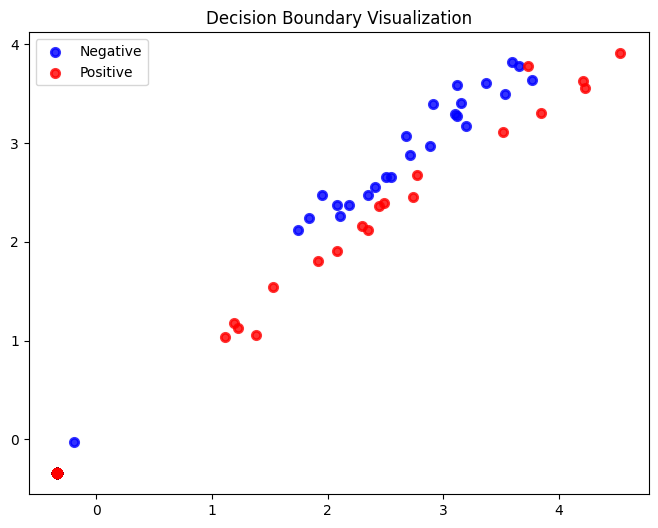

In [ ]:
# Assuming X_train_scaled has been transformed to 2D for visualization purposes
plt.figure(figsize=(8, 6))
colors = ['b', 'r']
for color, i, target_name in zip(colors, [0, 1], ['Negative', 'Positive']):
    plt.scatter(X_train_scaled[y_train == i, 0], X_train_scaled[y_train == i, 1],
                color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Decision Boundary Visualization')
plt.show()

In [ ]:
actual_labels = ['Weapon' if label == 1 else 'No weapon' for label in y_test]
predicted_labels = ['Weapon' if label == 1 else 'No weapon' for label in y_pred]

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Image': range(len(y_test)),
    'Actual_Label': actual_labels,
    'Predicted_Label': predicted_labels
})

results_df.to_csv("/content/LogisticReg_predictions.csv" , index=False)

In [ ]:
print(results_df.head())

   Image Actual_Label Predicted_Label
0      0    No weapon       No weapon
1      1       Weapon          Weapon
2      2       Weapon          Weapon
3      3       Weapon          Weapon
4      4       Weapon          Weapon


In [ ]:
from google.colab import files
files.download('LogisticReg_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>